****1.Create User table With email, username, password.****

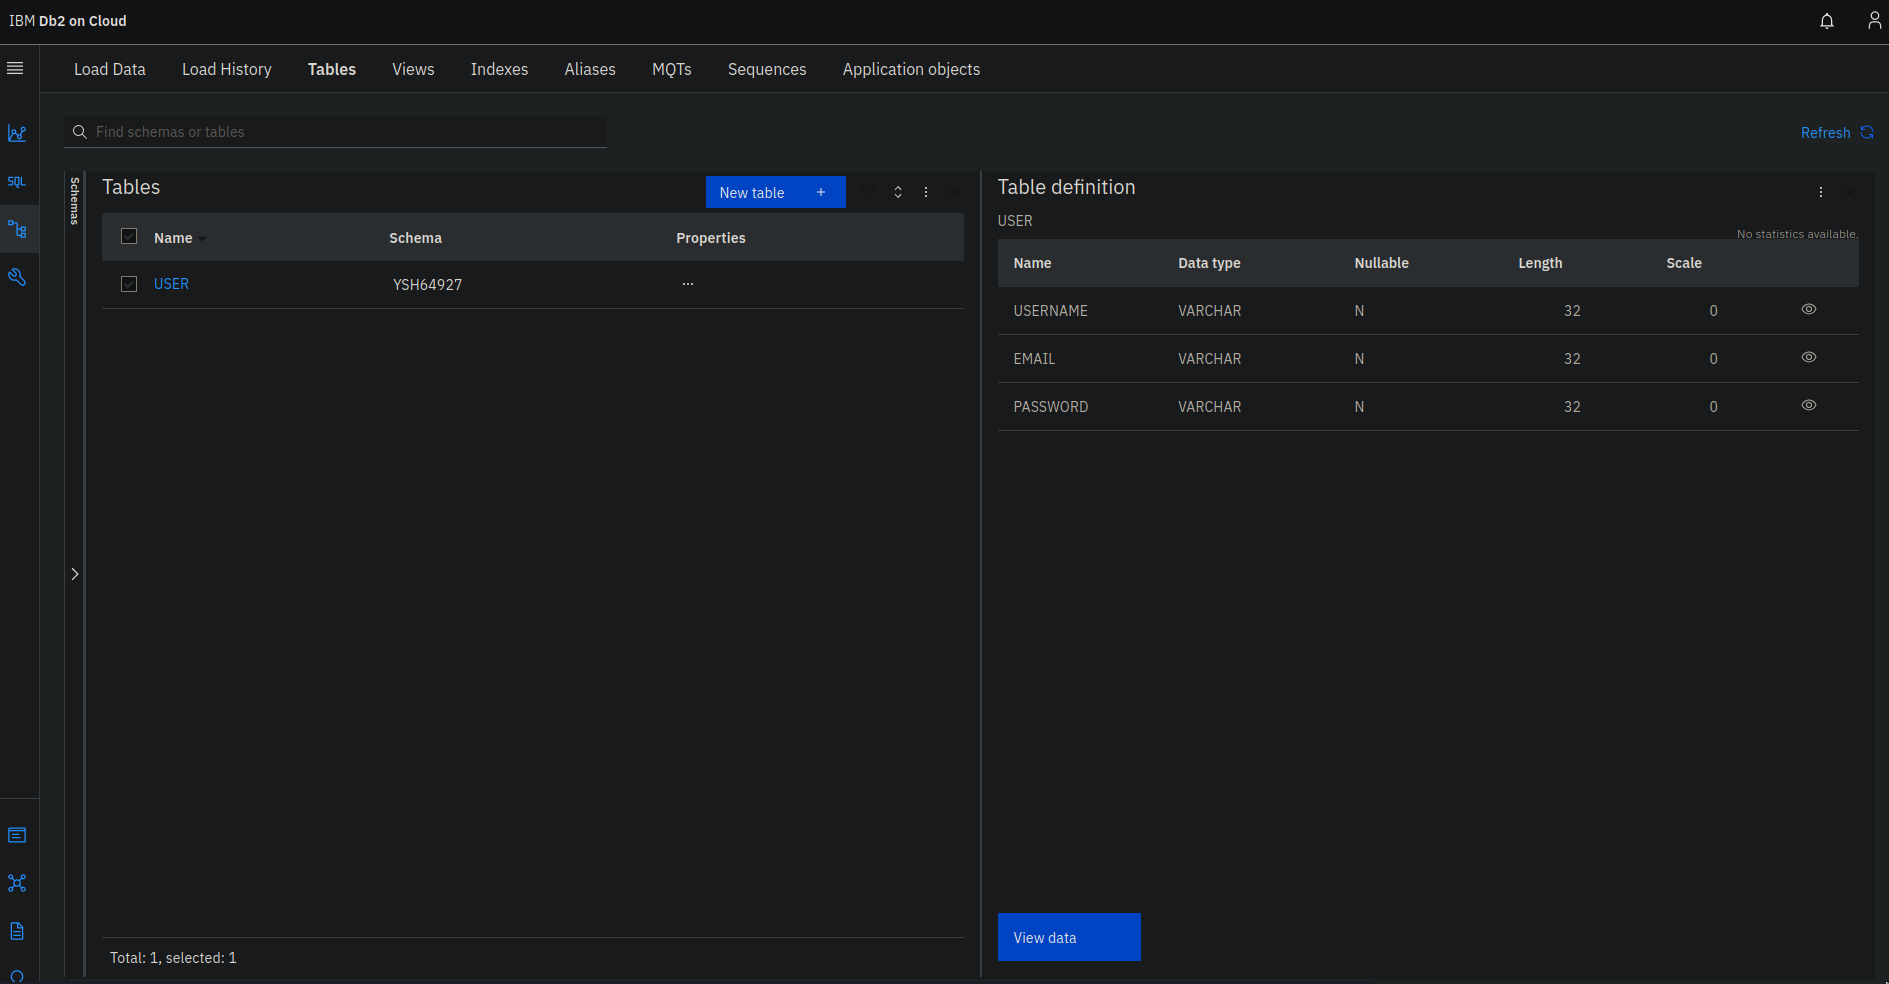

****3.Perform UPDATE, DELETE Queries with user table.****

In [ ]:
UPDATE user SET password = 'vinod' WHERE username = 'vinod' ;
DELETE FROM user WHERE username='abcd123';

#Output

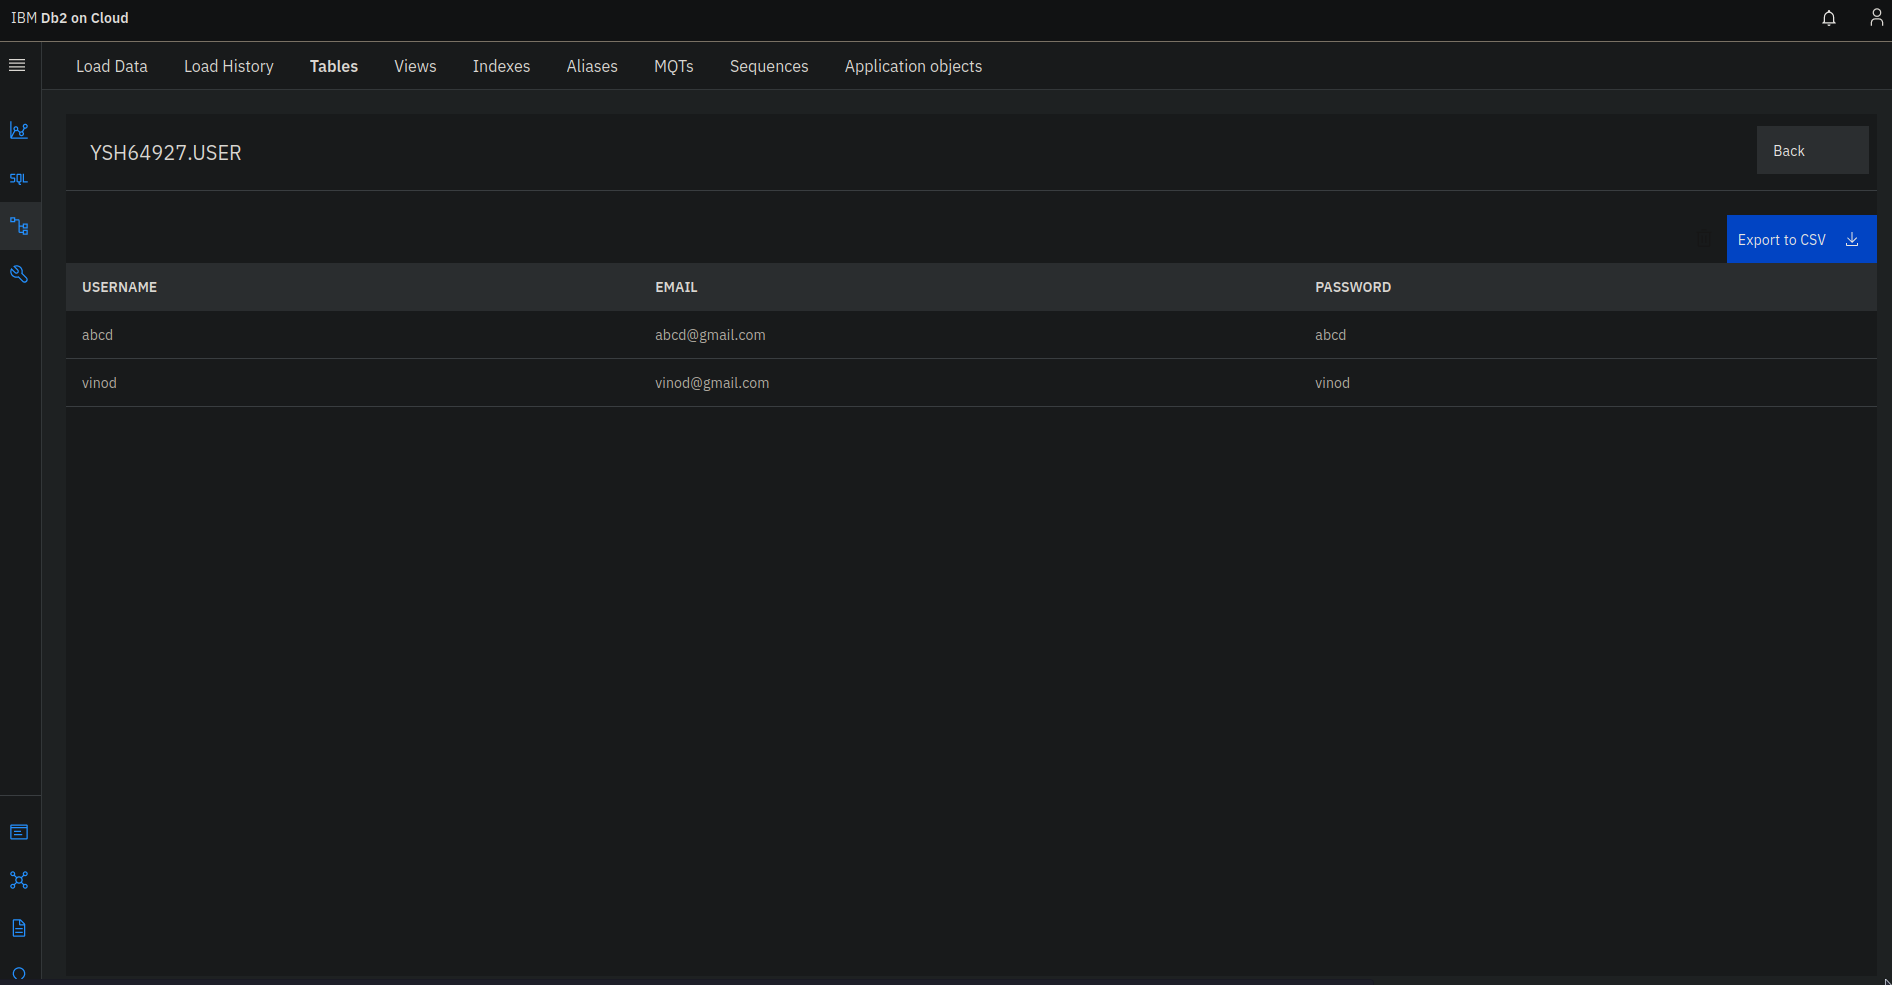

****3.Connet python code to db2.****

****4.Create a flask app with registeration page, login page, welcome page. By defalut load the registeration page once the user enters all fields store the data in database and navigate to login page authenticate user username and password. If the user is valid show the welcome page.****

#Code

app.py

Location: /app.py

In [ ]:
from flask import Flask, render_template, request, redirect, url_for, session
import ibm_db
import re


app = Flask(__name__)
app.secret_key = 'a'
conn = ibm_db.connect("DATABASE=bludb;HOSTNAME=98538591-7217-4024-b027-8baa776ffad1.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud;PORT=30875;Security=SSL;SSLServerCertificate=DigiCertGlobalRootCA.crt;UID=iamuser;PWD=404ForCon",'','')

@app.route('/')
@app.route('/login', methods =['GET', 'POST'])
def login():
    msg = ''
    if request.method == 'POST' and 'username' in request.form and 'password' in request.form:
        username = request.form['username']
        password = request.form['password']
        stmt = ibm_db.prepare(conn,'SELECT * FROM user WHERE username = ? AND password = ?')
        ibm_db.bind_param(stmt,1,username)
        ibm_db.bind_param(stmt,2,password)
        ibm_db.execute(stmt)
        account = ibm_db.fetch_assoc(stmt)
        if account:
            session['loggedin'] = True
            session['username'] = account['USERNAME']
            msg = 'Logged in successfully !'
            return render_template('index.html', msg = msg)
        else:
            msg = 'Incorrect username / password !'
    return render_template('login.html', msg = msg)

@app.route('/logout')
def logout():
    session.pop('loggedin', None)
    session.pop('id', None)
    session.pop('username', None)
    return redirect(url_for('login'))

@app.route('/register', methods =['GET', 'POST'])
def register():
    msg = ''
    if request.method == 'POST' and 'username' in request.form and 'password' in request.form and 'email' in request.form :
        username = request.form['username']
        password = request.form['password']
        email = request.form['email']
        stmt = ibm_db.prepare(conn,'SELECT * FROM user WHERE username = ?')
        ibm_db.bind_param(stmt,1,username)
        ibm_db.execute(stmt)
        account = ibm_db.fetch_assoc(stmt)
        if account:
            msg = 'Account already exists !'
        elif not re.match(r'[^@]+@[^@]+\.[^@]+', email):
            msg = 'Invalid email address !'
        elif not re.match(r'[A-Za-z0-9]+', username):
            msg = 'Username must contain only characters and numbers !'
        elif not username or not password or not email:
            msg = 'Please fill out the form !'
        else:
            prep_stmt = ibm_db.prepare(conn,"INSERT INTO user VALUES(?, ?, ?)")
            ibm_db.bind_param(prep_stmt, 1, username)
            ibm_db.bind_param(prep_stmt, 2, email)
            ibm_db.bind_param(prep_stmt, 3, password)
            ibm_db.execute(prep_stmt)
            msg = 'You have successfully registered !'
    elif request.method == 'POST':
        msg = 'Please fill out the form !'
    return render_template('register.html', msg = msg)

if __name__ == '__main__':
    app.debug = True
    app.run(host='0.0.0.0',port=8080)


index.html

Location : templates/index.html

In [ ]:
<html>
	<head>
		<meta charset="UTF-8">
		<title> Index </title>
		<link rel="stylesheet" href="{{ url_for('static', filename='style.css') }}">					
	</head>
	<body></br></br></br></br></br>
		<div align="center">
		<div align="center" class="border">
			<div class="header">
				<h1 class="word">Index</h1>
			</div></br></br></br>
				<h1 class="bottom">
					Hi {{session.username}}!!</br></br> Welcome to Our page...				
				</h1></br></br></br>
				<a href="{{ url_for('logout') }}" class="btn">Logout</a>
		</div>
		</div>
	</body>
</html>

login.html

Location : templates/login.html

In [ ]:
<html>
	<head>
		<meta charset="UTF-8">
		<title> Login </title>
		<link rel="stylesheet" href="{{ url_for('static', filename='style.css') }}">		
	</head>
	<body></br></br></br></br></br>
		<div align="center">
		<div align="center" class="border">
			<div class="header">
				<h1 class="word">Login</h1>
			</div></br></br></br>
			<h2 class="word">
				<form action="{{ url_for('login') }}" method="post">
				<div class="msg">{{ msg }}</div>
					<input id="username" name="username" type="text" placeholder="Enter Your Username" class="textbox"/></br></br>
					<input id="password" name="password" type="password" placeholder="Enter Your Password" class="textbox"/></br></br></br>
					<input type="submit" class="btn" value="Sign In"></br></br>
				</form>
			</h2>
			<p class="bottom">Don't have an account? <a class="bottom" href="{{url_for('register')}}"> Sign Up here</a></p>
		</div>
		</div>
	</body>
</html>

register.html

Location : templates/register.html

In [ ]:
<html>
	<head>
		<meta charset="UTF-8">
		<title> Register </title>
		<link rel="stylesheet" href="{{ url_for('static', filename='style.css') }}">			
	</head>
	<body></br></br></br></br></br>
		<div align="center">
		<div align="center" class="border">
			<div class="header">
				<h1 class="word">Register</h1>
			</div></br></br></br>
			<h2 class="word">
				<form action="{{ url_for('register') }}" method="post">
				<div class="msg">{{ msg }}</div>
					<input id="username" name="username" type="text" placeholder="Enter Your Username" class="textbox"/></br></br>
					<input id="password" name="password" type="password" placeholder="Enter Your Password" class="textbox"/></br></br>
					<input id="email" name="email" type="text" placeholder="Enter Your Email ID" class="textbox"/></br></br>
					<input type="submit" class="btn" value="Sign Up"></br>
				</form>
			</h2>
			<p class="bottom">Already have an account? <a class="bottom" href="{{url_for('login')}}"> Sign In here</a></p>
		</div>
		</div>
	</body>
</html>

style.css

Location : static/style.css

In [ ]:
.header{
    padding: 5px 120px;
    width: 150px;
    height: 70px;
    background-color: #236B8E;
}

.border{
    padding: 80px 50px;
    width: 400px;
    height: 450px;
    border: 1px solid #236B8E;
    border-radius: 0px;
    background-color: #9AC0CD;
}

.btn {
    padding: 10px 40px;
    background-color: #236B8E;
    color: #FFFFFF;
    font-style: oblique;
    font-weight: bold;
    border-radius: 10px;
}

.textbox{
    padding: 10px 40px;
    background-color: #236B8E;
    text-color: #FFFFFF;
    border-radius: 10px;
}
    
::placeholder {
    color: #FFFFFF;
    opacity: 1;
    font-style: oblique;
    font-weight: bold;
}

.word{
    color: #FFFFFF;
    font-style: oblique;
    font-weight: bold;
}

.bottom{
    color: #236B8E;
    font-style: oblique;
    font-weight: bold;
}


#Output

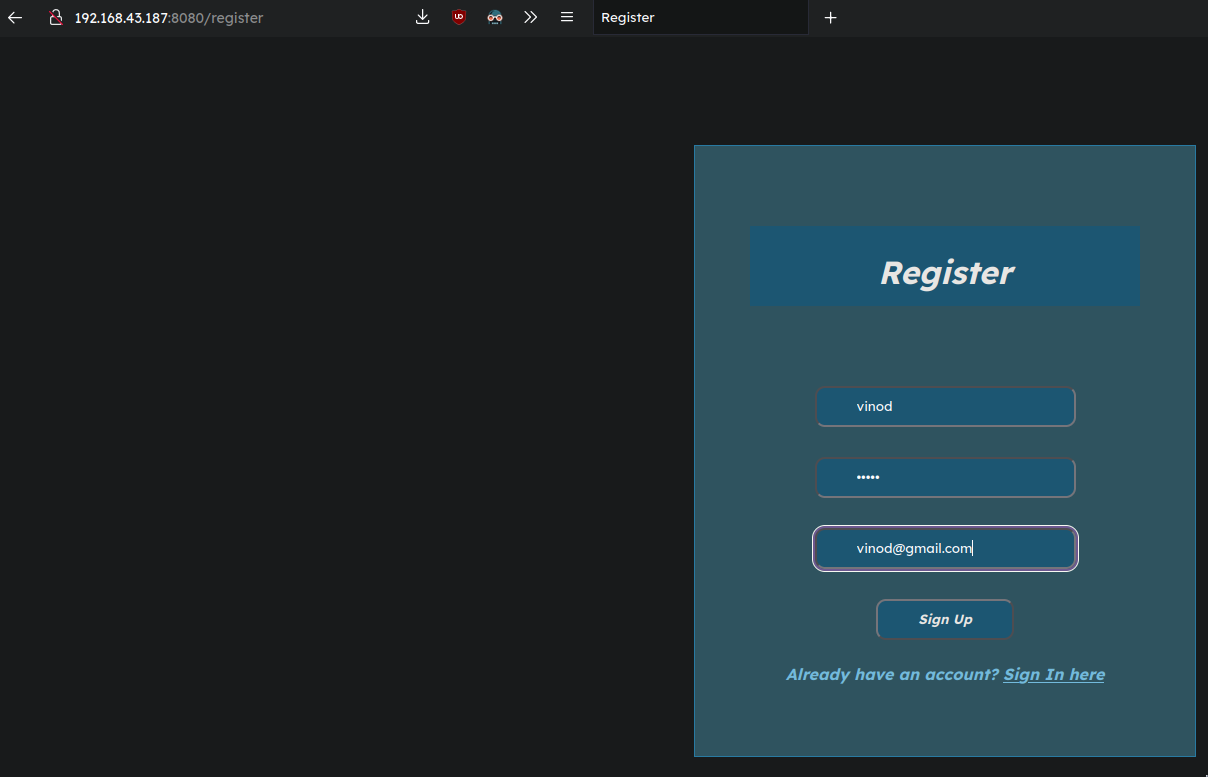

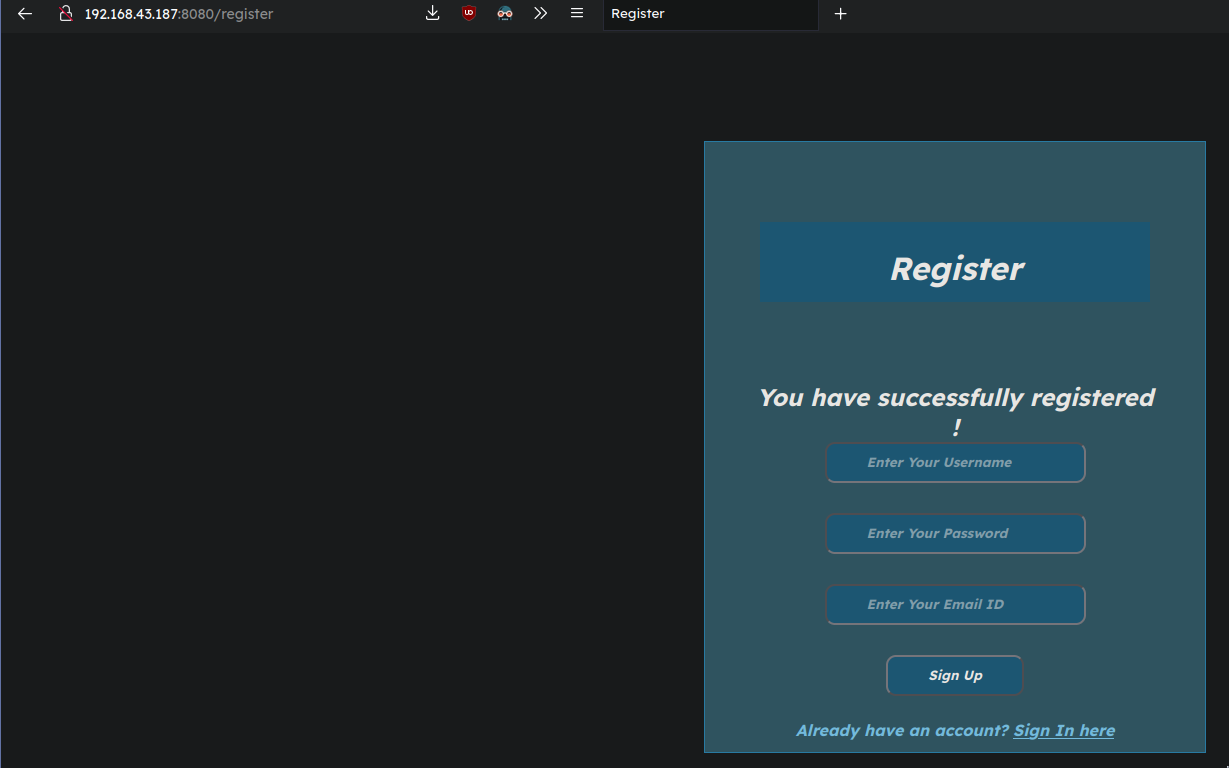

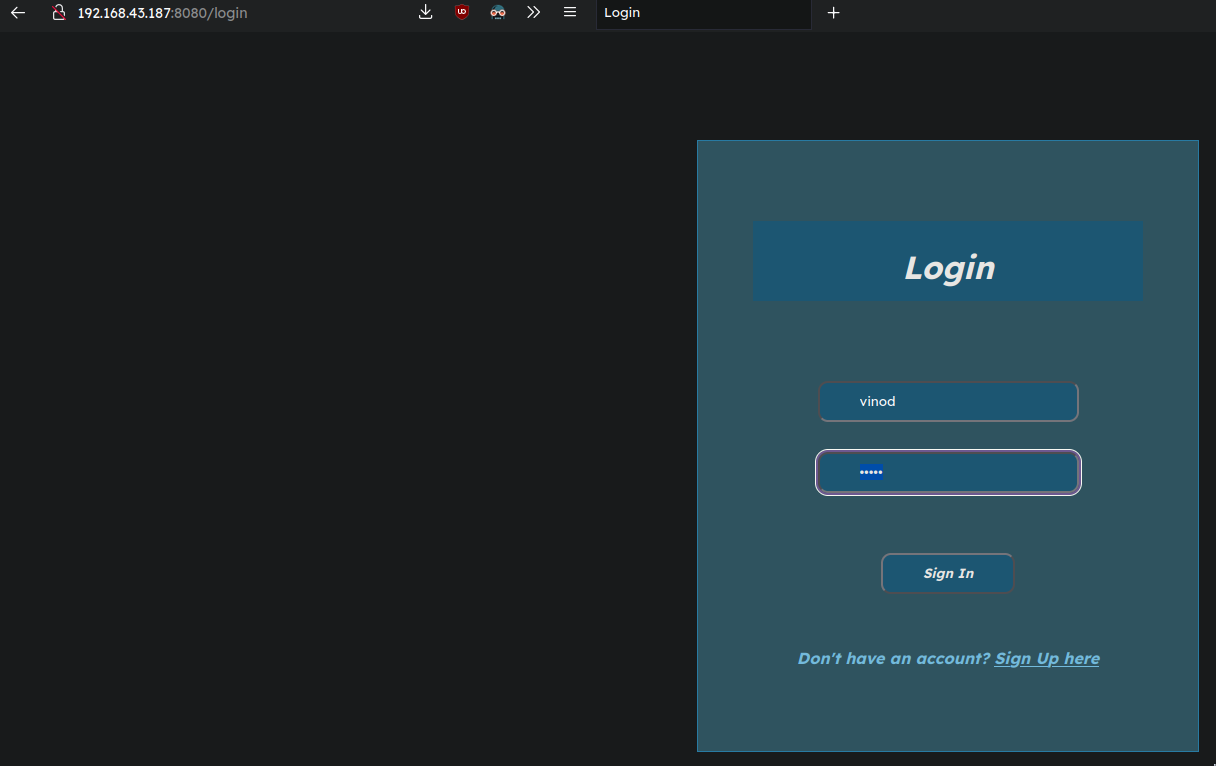

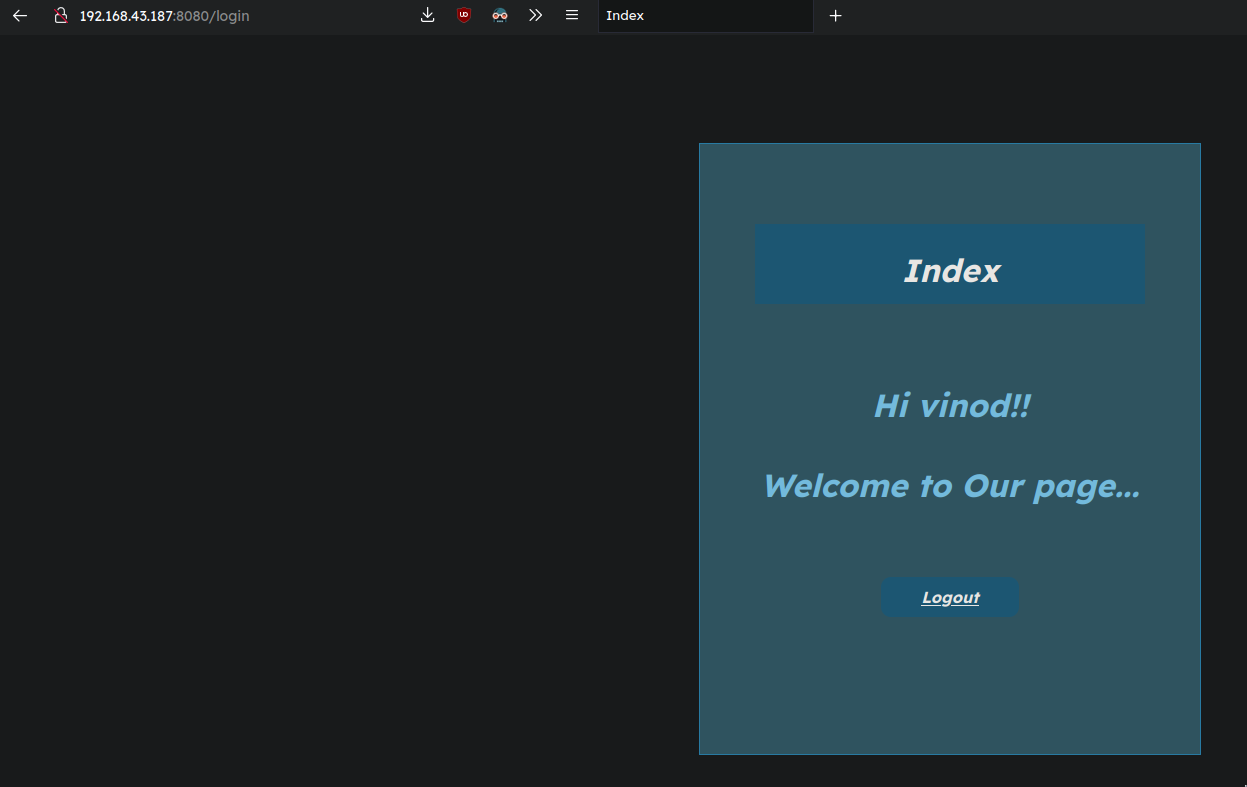